In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import os
import re
import keras
import random
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19


In [3]:
DIRECTORY_ROOT = r'D:\BreastDataset\Train'
size = 224
labels = os.listdir(DIRECTORY_ROOT)
labels.sort()
print(labels)

['Benign', 'InSitu', 'Invasive', 'Normal']


In [7]:
def get_data(data_dir):
    data = [] 
    labels = os.listdir(r'D:\BreastDataset\Train')
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (224,224)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
data = get_data(DIRECTORY_ROOT)

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6lylwdcz\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

D:\BreastDataset\Train\Normal\N (367)1.tif
Get data done!


In [6]:
len(data)

4782

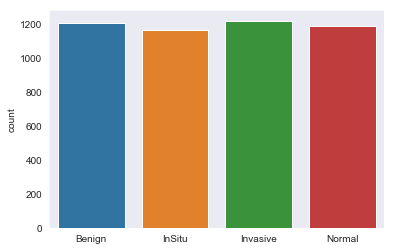

In [8]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

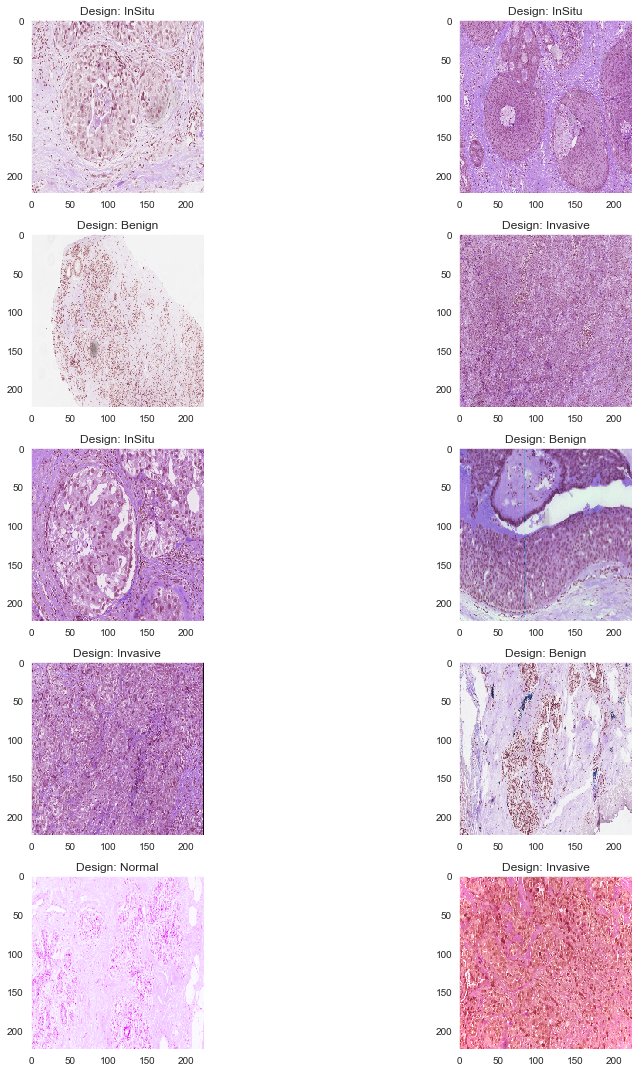

In [9]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Design: '+labels[data[l][1]])
        
plt.tight_layout()

In [10]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [11]:
# Normalize the data
x = np.array(x) / 255

In [12]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [13]:
import numpy as np
import h5py

# labels = np.array(labels)
# np.save('labels.npy', labels)



hf = h5py.File('D:\Datanew\data.h5', 'a')
hf.create_dataset('x', data=x)
hf.create_dataset('y', data=y)
hf.close()

#np.save('dataX.npy', x)
#np.save('dataY.npy', y)
#np.savez('data.npz', x=x, y=y)

In [14]:
del x,y,data

In [14]:
hf = h5py.File('D:\Datanew\data.h5', 'r')
hf.keys()

<KeysViewHDF5 ['x', 'y']>

In [25]:
print(shapex)

[[[[0.84705882 0.73333333 0.90588235]
   [0.81568627 0.6627451  0.87843137]
   [0.75294118 0.55294118 0.86666667]
   ...
   [0.69411765 0.4627451  0.7254902 ]
   [0.76078431 0.59607843 0.80784314]
   [0.75686275 0.60784314 0.81176471]]

  [[0.78823529 0.62352941 0.83529412]
   [0.79215686 0.6627451  0.90588235]
   [0.79607843 0.64705882 0.89411765]
   ...
   [0.76078431 0.56470588 0.80392157]
   [0.81568627 0.65490196 0.86666667]
   [0.80392157 0.6627451  0.8627451 ]]

  [[0.86666667 0.81176471 0.90588235]
   [0.83137255 0.68235294 0.85882353]
   [0.79607843 0.64313725 0.87058824]
   ...
   [0.75686275 0.56470588 0.89019608]
   [0.75294118 0.56078431 0.79215686]
   [0.77254902 0.59215686 0.80784314]]

  ...

  [[0.68627451 0.46666667 0.75294118]
   [0.69019608 0.46666667 0.75686275]
   [0.73333333 0.55686275 0.79215686]
   ...
   [0.63921569 0.39215686 0.68235294]
   [0.83137255 0.71764706 0.8745098 ]
   [0.92156863 0.90196078 0.9372549 ]]

  [[0.60784314 0.34509804 0.58823529]
   [0.6